# Forum Group Discussion MK Praktikum Unggulan (Praktikum DGX)
---
Forum Group Discussion ini dilaksanakan sebagai wadah diskusi peserta untuk mendalami materi yang berkaitan dengan MK Praktikum Unggulan (Praktikum DGX), guna mendukung pemahaman konsep, analisis permasalahan, serta penerapan materi sesuai dengan ruang lingkup program studi.

# Hands-On Prediksi Biaya Listrik Menggunakan Algoritma Regresi Linier
---
Hands-On ini bertujuan untuk memperkenalkan penerapan algoritma/model regresi linier dalam studi kasus berupa prediksi biaya listrik pelanggan berdasarkan variabel seperti Tipe Customer, Luas Bangunan, dan Jumlah Penghuni.

<a id='home'></a>
<h2>Daftar Isi</h2>

- <a href=#CRISP_DM>CRISP-DM</a>
- <a href=#Business>Business Understanding</a>
- <a href=#Understanding>Data Understanding</a>
- <a href=#Preparation>Data Preparation</a>
- <a href=#Modelling>Modelling</a>
- <a href=#Evaluation>Evaluation Model</a>
- <a href=#Deployment>Deployment</a>

<a id='CRISP_DM'></a>
# CRISP-DM
<hr>
CRISP-DM (Cross-Industry Standard Process for Data Mining) merupakan suatu metodologi yang menjadi standarisasi dalam hal proyek data mining, analytics dan data science. Metode ini terdiri dari enam tahapan, yaitu:

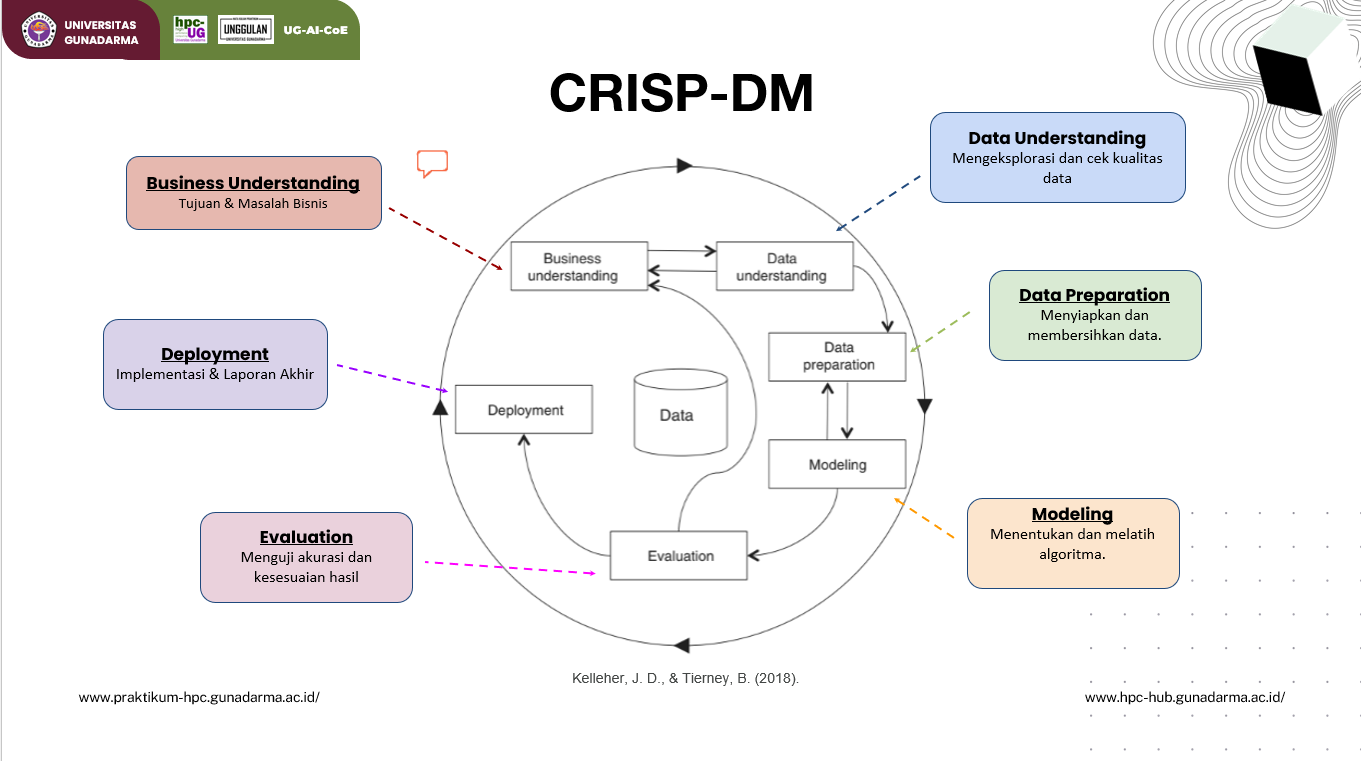

Setiap tahapan dalam CRISP-DM saling berkaitan dan bersifat iteratif, sehingga memungkinkan penyesuaian pada tahap sebelumnya apabila ditemukan kendala atau insight baru pada tahap selanjutnya.

<a id='Business'></a>
# Business Understanding
<hr>

## Latar Belakang
Dalam pengelolaan energi listrik, estimasi biaya listrik pelanggan menjadi hal penting bagi perusahaan penyedia listrik maupun pelanggan itu sendiri. Biaya listrik dipengaruhi oleh beberapa faktor seperti tipe pelanggan (residensial atau komersial), luas bangunan, dan jumlah penghuni. Penetapan estimasi biaya yang kurang akurat dapat menyebabkan ketidaksesuaian antara ekspektasi pelanggan dan tagihan aktual. Oleh karena itu, diperlukan pendekatan berbasis data untuk memahami hubungan antara faktor-faktor tersebut terhadap biaya listrik. Pada studi kasus ini, machine learning dengan algoritma regresi linier digunakan untuk membangun model prediksi biaya listrik berdasarkan karakteristik pelanggan dan bangunan. Model ini diharapkan dapat membantu dalam melakukan estimasi biaya listrik secara lebih akurat dan terukur.

## Permasalahan
Masalah yang diangkat dalam proyek ini adalah :
*   Estimasi biaya listrik pelanggan yang belum akurat.
*   Kurangnya pemahaman hubungan antara faktor luas bangunan, jumlah penghuni, dan tipe pelanggan terhadap biaya listrik.



## Tujuan
Tujuan dari proyek ini adalah:
* Menerapkan algoritma/model kecerdasan buatan sederhana yaitu regresi linier.
* Mengetahui hubungan antara variabel dependen (Biaya Listrik) dan independen (Luas Bangunan, Jumlah Penghuni) pada dataset.
* Menerapkan langkah-langkah secara runut dalam pengolahan dan pemodelan data menggunakan algoritma regresi linier.

<a id='Understanding'></a>
# Data Understanding
<hr>
Pada bagian ini dilakukan penelaahan data guna memahami karakteristik data secara komprehensif sebelum digunakan untuk melatih algoritma.

## Dataset:
Dataset yang digunakan merupakan data konsumsi energi listrik pelanggan. Dataset terdiri dari 6 kolom dan 5001 baris. Kolom/fitur terdiri dari:
1. **id_Customer** (Identitas pelanggan)
2. **Tipe_Customer** (Tipe pelanggan: residential atau commercial)
3. **Region** (Wilayah pelanggan)
4. **Luas_Bangunan_m2** (Luas bangunan dalam meter persegi)
5. **Jumlah_Penghuni** (Jumlah penghuni dalam bangunan)
6. **Biaya_Listrik** (Biaya listrik pelanggan)

## Import Library
Kode berikut digunakan untuk mengimpor library yang digunakan dalam Hands-On ini yaitu:
 * `pandas` : Manipulasi data.
 * `numpy` : Operasi aritmatika.
 * `matplotlib.pyplot` : Visualisasi data.
 * `seaborn` : Visualisasi data.
 * `sklearn.model_selection import train_test_split` : Pembagian dataset
 * `sklearn.linear_model import LinearRegression` : Model regresi linier.
 * `from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error` : Evaluasi model regresi linier.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

## Load Dataset
Dataset dimuat menggunakan library pandas sebagai tahap awal eksplorasi untuk memastikan data dapat digunakan pada proses analisis dan pemodelan.

In [2]:
df = pd.read_csv('energy_consumption_modified.csv')

In [3]:
df.head()

,id_Customer,Tipe_Customer,Region,Luas_Bangunan_m2,Jumlah_Penghuni,Biaya_Listrik
0,CUSTOMER_0001,residential,Northeast,24,2,64.51
1,CUSTOMER_0002,commercial,Midwest,24,1,55.26
2,CUSTOMER_0003,commercial,Southeast,24,1,74.54
3,CUSTOMER_0004,residential,Northeast,45,4,147.06
4,CUSTOMER_0005,residential,Southeast,45,4,143.06


Dataset terdiri dari 6 kolom yang mencakup identitas pelanggan (`id_Customer`), kategori pelanggan (`Tipe_Customer`), lokasi (`Region`), serta atribut numerik berupa luas bangunan, jumlah penghuni, dan biaya listrik sebagai variabel target.

## Struktur dan Tipe Data
Untuk memahami struktur dataset, dilakukan pengecekan jumlah baris, kolom, serta tipe data masing-masing atribut.
Kode berikut digunakan untuk mengetahui tipe data dari masing-masing kolom. Dalam kasus ini kolom id_Customer memiliki tipe data object (string), kolom Tipe_Customer dan Region memiliki tipe data object (kategorikal), sedangkan kolom Luas_Bangunan_m2, Jumlah_Penghuni, dan Biaya_Listrik memiliki tipe data numerik.

In [4]:
df.shape

(5000, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_Customer       5000 non-null   object 
 1   Tipe_Customer     5000 non-null   object 
 2   Region            5000 non-null   object 
 3   Luas_Bangunan_m2  5000 non-null   int64  
 4   Jumlah_Penghuni   5000 non-null   int64  
 5   Biaya_Listrik     5000 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 234.5+ KB


Dataset memiliki 3 kolom numerik (`Luas_Bangunan_m2`, `Jumlah_Penghuni`, `Biaya_Listrik`) dan 3 kolom kategorikal/object (`id_Customer`, `Tipe_Customer`, `Region`). Tidak ada missing value pada semua kolom, menandakan data sudah cukup bersih.

## Statistik Deskriptif
Analisis statistik deskriptif dilakukan untuk melihat sebaran nilai numerik, khususnya pada variabel target.

In [6]:
df.describe(include="all")

,id_Customer,Tipe_Customer,Region,Luas_Bangunan_m2,Jumlah_Penghuni,Biaya_Listrik
count,5000,5000,5000,5000.00000,5000.000000,5000.000000
unique,5000,2,5,NaN,NaN,NaN
top,CUSTOMER_5000,residential,Midwest,NaN,NaN,NaN
freq,1,3261,2012,NaN,NaN,NaN
mean,NaN,NaN,NaN,39.57620,2.301800,86.874028
std,NaN,NaN,NaN,17.51638,1.032729,24.383261
min,NaN,NaN,NaN,17.00000,1.000000,52.520000
25%,NaN,NaN,NaN,24.00000,1.000000,68.557500
50%,NaN,NaN,NaN,45.00000,2.000000,83.715000
75%,NaN,NaN,NaN,45.00000,3.000000,98.242500


Statistik deskriptif menunjukkan rata-rata biaya listrik, luas bangunan, dan jumlah penghuni. Perhatikan standar deviasi untuk mengidentifikasi variabilitas data. Variabel target `Biaya_Listrik` memiliki rentang nilai yang cukup luas, mengindikasikan keragaman pola konsumsi listrik pelanggan.

## Missing Value Analysis
Selanjutnya dilakukan analisis nilai kosong (missing values) pada setiap kolom.

In [7]:
df.isnull().sum()

id_Customer         0
Tipe_Customer       0
Region              0
Luas_Bangunan_m2    0
Jumlah_Penghuni     0
Biaya_Listrik       0
dtype: int64

Tidak ditemukan missing value dalam dataset. Hal ini baik karena missing value dapat menyebabkan error pada proses pelatihan model, mengurangi jumlah data yang dapat digunakan, atau menghasilkan prediksi yang tidak akurat jika tidak ditangani dengan tepat.

## Data Duplikat
Pengecekan jumlah data duplikat perlu dilakukan untuk memastikan tidak ada data berulang yang berpotensi menimbulkan bias.

In [9]:
df.duplicated().sum()

np.int64(0)

Tidak ditemukan data duplikat dalam dataset. Hal ini baik karena data duplikat dapat menyebabkan model menghafal pola berulang dan menghasilkan evaluasi yang bias.

## Matriks Korelasi
Kode berikut digunakan untuk menilai seberapa erat hubungan (korelasi) antar kolom melalui visualisasi matriks. Elemen kotak dengan korelasi tinggi memiliki nilai mendekati 1 (satu) sedangkan jika tidak berkorelasi sama sekali adalah 0 (nol).

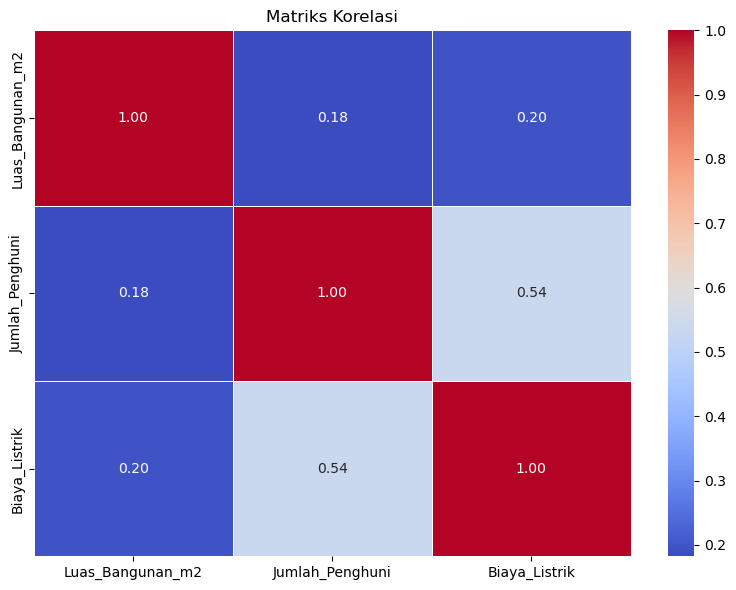

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
correlation_matrix = df.select_dtypes(include='number').corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi')
plt.tight_layout()
plt.show()

Matriks korelasi menunjukkan bahwa variabel Jumlah_Penghuni memiliki korelasi positif sedang (0.54) dengan Biaya_Listrik, menjadikannya prediktor utama dalam model. Sementara itu, Luas_Bangunan_m2 hanya memiliki korelasi lemah (0.20) terhadap Biaya_Listrik. Korelasi antar variabel independen (Luas_Bangunan_m2 dan Jumlah_Penghuni) sangat rendah (0.18), mengindikasikan tidak ada multikolinearitas signifikan sehingga kedua fitur dapat digunakan bersama dalam model.

## Analisis Univariat
Analisis univariat merupakan tahap analisis data yang berfokus pada satu variabel saja tanpa melihat hubungannya dengan variabel lain. Kode berikut digunakan untuk membuat visualisasi univariat yaitu histogram dan boxplot. Visualisasi histogram digunakan untuk mengukur persebaran data sedangkan visualisasi boxplot digunakan untuk mendeteksi outlier.

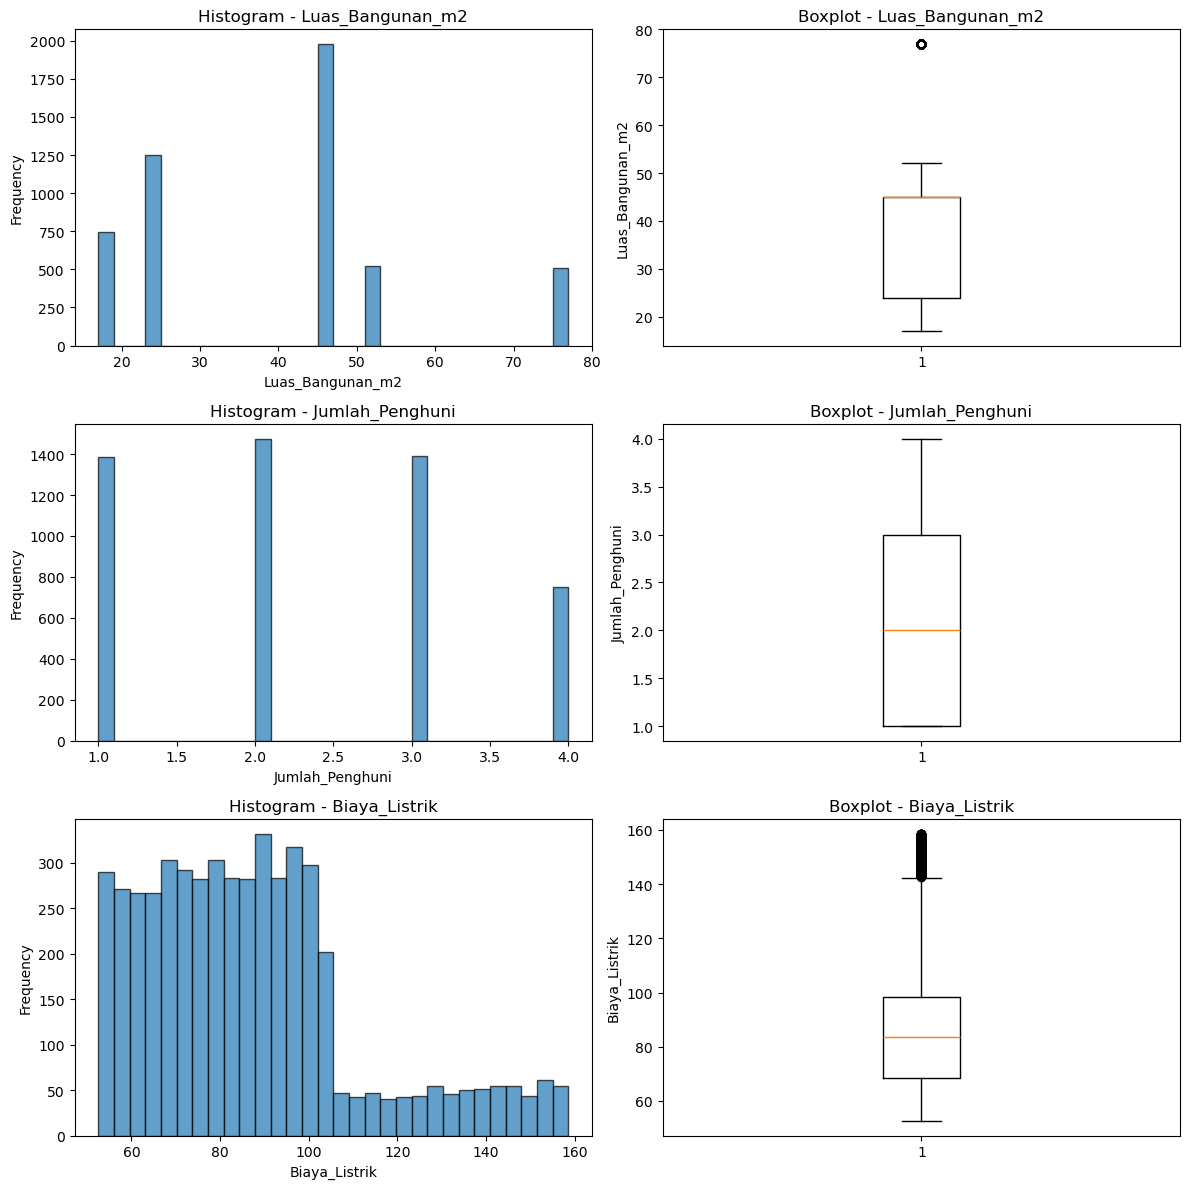

In [11]:
# Analisis Univariat - Histogram dan Boxplot
numerical_cols = df.select_dtypes(include='number').columns.tolist()

fig, axes = plt.subplots(len(numerical_cols), 2, figsize=(12, 4*len(numerical_cols)))

for i, col in enumerate(numerical_cols):
    # Histogram
    axes[i, 0].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    axes[i, 0].set_title(f'Histogram - {col}')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Frequency')
    
    # Boxplot
    axes[i, 1].boxplot(df[col].dropna())
    axes[i, 1].set_title(f'Boxplot - {col}')
    axes[i, 1].set_ylabel(col)

plt.tight_layout()
plt.show()

Histogram digunakan untuk menggambarkan distribusi frekuensi setiap variabel numerik, dimana distribusi yang mendekati normal mengindikasikan data yang seimbang. Boxplot digunakan untuk mendeteksi keberadaan outlier, dimana titik-titik yang berada di luar whisker menandakan data pencilan yang perlu diperhatikan saat tahap preprocessing.

## Analisis Bivariat
Analisis bivariat adalah teknik analisis data yang digunakan untuk memahami hubungan antara dua variabel serta pola atau tren yang terbentuk di antara keduanya. Analisis ini bertujuan untuk mengetahui apakah terdapat keterkaitan, arah hubungan (positif atau negatif), serta kekuatan hubungan antara variabel independen dan variabel dependen. Kode berikut digunakan untuk membuat scatter plot antara dua kolom, dalam kasus ini adalah kolom Luas_Bangunan_m2 dengan Biaya_Listrik serta Jumlah_Penghuni dengan Biaya_Listrik.

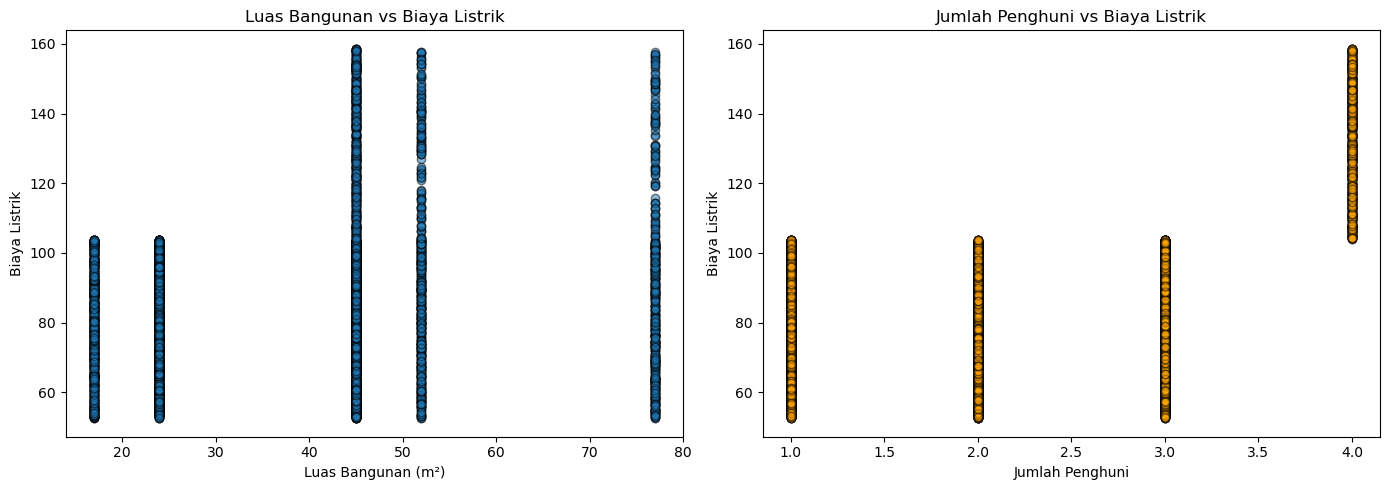

In [12]:
# Analisis Bivariat - Scatter Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot Luas_Bangunan_m2 vs Biaya_Listrik
axes[0].scatter(df['Luas_Bangunan_m2'], df['Biaya_Listrik'], alpha=0.5, edgecolors='k')
axes[0].set_xlabel('Luas Bangunan (m²)')
axes[0].set_ylabel('Biaya Listrik')
axes[0].set_title('Luas Bangunan vs Biaya Listrik')

# Scatter plot Jumlah_Penghuni vs Biaya_Listrik
axes[1].scatter(df['Jumlah_Penghuni'], df['Biaya_Listrik'], alpha=0.5, edgecolors='k', color='orange')
axes[1].set_xlabel('Jumlah Penghuni')
axes[1].set_ylabel('Biaya Listrik')
axes[1].set_title('Jumlah Penghuni vs Biaya Listrik')

plt.tight_layout()
plt.show()

Scatter plot Luas Bangunan vs Biaya Listrik menunjukkan hubungan yang lemah dengan titik-titik tersebar tanpa pola jelas, sejalan dengan korelasi rendah (0.20). Sementara scatter plot Jumlah Penghuni vs Biaya Listrik memperlihatkan pola positif yang lebih terlihat, dimana semakin banyak penghuni cenderung meningkatkan biaya listrik, mengkonfirmasi bahwa `Jumlah_Penghuni` adalah fitur yang lebih berpengaruh terhadap variabel target.

Berdasarkan hasil data understanding ini, dapat disimpulkan bahwa dataset memiliki kualitas baik tanpa missing value dan duplikat. Variabel `Jumlah_Penghuni` merupakan prediktor terkuat untuk `Biaya_Listrik` (korelasi 0.54), sedangkan `Luas_Bangunan_m2` berpengaruh lemah. Kedua fitur dapat digunakan bersama karena tidak ada multikolinearitas signifikan. Tahap selanjutnya adalah Data Preparation untuk transformasi fitur kategorikal dan normalisasi data.

<a id='Preparation'></a>
# Data Preparation
<hr>
Tahap Data Preparation bertujuan untuk mengubah data mentah menjadi data yang siap digunakan oleh algoritma machine learning. Proses ini meliputi pembersihan data, rekayasa fitur, dan penyusunan pipeline preprocessing agar proses pelatihan serta prediksi konsisten.

## Handling Outlier (IQR Clipping)
IQR Clipping adalah teknik penanganan outlier dengan cara mengganti nilai ekstrem pada data dengan nilai batas IQR (Interquartile Range). Nilai di bawah Q1 - 1.5*IQR akan di-clip ke batas bawah, dan nilai di atas Q3 + 1.5*IQR akan di-clip ke batas atas. Metode ini dipilih karena dapat mengurangi pengaruh outlier terhadap model tanpa kehilangan jumlah data.

In [13]:
# Handling Outlier dengan metode IQR Clipping
# Kolom numerik yang akan di-handle
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Hitung dan tampilkan outlier sebelum handling
print("Jumlah outlier sebelum handling:")
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier_count = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)].shape[0]
    print(f"  {col}: {outlier_count} outlier")

# Clipping outlier
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    df[col] = df[col].clip(lower, upper)

print("\nData setelah IQR Clipping:")
df[['Luas_Bangunan_m2', 'Jumlah_Penghuni', 'Biaya_Listrik']].describe()

Jumlah outlier sebelum handling:
  Luas_Bangunan_m2: 509 outlier
  Jumlah_Penghuni: 0 outlier
  Biaya_Listrik: 242 outlier

Data setelah IQR Clipping:


,Luas_Bangunan_m2,Jumlah_Penghuni,Biaya_Listrik
count,5000.000000,5000.000000,5000.000000
mean,39.525300,2.301800,86.487074
std,17.407927,1.032729,23.387128
min,17.000000,1.000000,52.520000
25%,24.000000,1.000000,68.557500
50%,45.000000,2.000000,83.715000
75%,45.000000,3.000000,98.242500
max,76.500000,4.000000,142.770000


## Drop Kolom ID
Kolom `id_Customer` tidak memiliki nilai prediktif karena hanya berisi identifier unik. Kolom ini perlu dihapus sebelum proses modeling.

In [14]:
df.drop(columns='id_Customer', inplace=True)

print("Kolom setelah drop id_Customer:")
print(df.columns.tolist())
df.head()

Kolom setelah drop id_Customer:
['Tipe_Customer', 'Region', 'Luas_Bangunan_m2', 'Jumlah_Penghuni', 'Biaya_Listrik']


,Tipe_Customer,Region,Luas_Bangunan_m2,Jumlah_Penghuni,Biaya_Listrik
0,residential,Northeast,24.0,2,64.51
1,commercial,Midwest,24.0,1,55.26
2,commercial,Southeast,24.0,1,74.54
3,residential,Northeast,45.0,4,142.77
4,residential,Southeast,45.0,4,142.77


## Feature Selection
Feature Selection adalah proses memilih fitur-fitur yang paling relevan untuk digunakan dalam model. Pada tahap ini, semua kolom kecuali target (`Biaya_Listrik`) akan digunakan sebagai fitur independen (X).

In [15]:
# Memisahkan fitur dan target
X = df.drop("Biaya_Listrik", axis=1)
y = df["Biaya_Listrik"]

print(f"Fitur (X): {X.columns.tolist()}")
print(f"Target (y): Biaya_Listrik")
print(f"\nShape X: {X.shape}")
print(f"Shape y: {y.shape}")
X.head()

Fitur (X): ['Tipe_Customer', 'Region', 'Luas_Bangunan_m2', 'Jumlah_Penghuni']
Target (y): Biaya_Listrik

Shape X: (5000, 4)
Shape y: (5000,)


,Tipe_Customer,Region,Luas_Bangunan_m2,Jumlah_Penghuni
0,residential,Northeast,24.0,2
1,commercial,Midwest,24.0,1
2,commercial,Southeast,24.0,1
3,residential,Northeast,45.0,4
4,residential,Southeast,45.0,4


## One-Hot Encoding
One-Hot Encoding adalah teknik untuk mengubah data kategorikal menjadi representasi biner. Setiap kategori unik diubah menjadi kolom baru dengan nilai 0 atau 1. Teknik ini diterapkan pada seluruh fitur X untuk memastikan semua data dalam format numerik yang dapat diproses oleh algoritma regresi linier.

In [16]:
# Mengubah semua fitur menjadi representasi numerik
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown="ignore")
X_encoded = encoder.fit_transform(X)

print(f"Shape X sebelum encoding: {X.shape}")
print(f"Shape X setelah encoding: {X_encoded.shape}")
print(f"\nFitur hasil encoding:")
feature_names = encoder.get_feature_names_out()
for i, name in enumerate(feature_names):
    print(f"  {i+1}. {name}")

Shape X sebelum encoding: (5000, 4)
Shape X setelah encoding: (5000, 16)

Fitur hasil encoding:
  1. Tipe_Customer_commercial
  2. Tipe_Customer_residential
  3. Region_Midwest
  4. Region_North
  5. Region_Northeast
  6. Region_South
  7. Region_Southeast
  8. Luas_Bangunan_m2_17.0
  9. Luas_Bangunan_m2_24.0
  10. Luas_Bangunan_m2_45.0
  11. Luas_Bangunan_m2_52.0
  12. Luas_Bangunan_m2_76.5
  13. Jumlah_Penghuni_1
  14. Jumlah_Penghuni_2
  15. Jumlah_Penghuni_3
  16. Jumlah_Penghuni_4


In [17]:
# Data Split - Membagi data menjadi data latih dan data uji
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

print(f"Jumlah data latih: {X_train.shape[0]}")
print(f"Jumlah data uji: {X_test.shape[0]}")
print(f"Proporsi data uji: {X_test.shape[0] / X_encoded.shape[0] * 100:.1f}%")

Jumlah data latih: 3500
Jumlah data uji: 1500
Proporsi data uji: 30.0%


<a id='Modelling'></a>
# Modelling
<hr>
Tahap Modelling bertujuan membangun model prediksi menggunakan algoritma Linear Regression. Pada tahap ini, data yang telah dilakukan pre-processing akan digunakan untuk melatih algoritma regresi linier. Algoritma akan mempelajari data latih (X_train & y_train) kemudian diuji menggunakan data uji (X_test).

In [21]:
from sklearn.linear_model import LinearRegression

# Inisialisasi dan melatih model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
# Prediksi pada data uji
y_pred = model.predict(X_test)

## Feature Importance
Feature Importance menunjukkan seberapa besar kontribusi setiap fitur terhadap prediksi model. Pada regresi linier, importance dapat dilihat dari nilai absolut koefisien yang telah dinormalisasi. Semakin besar nilai koefisien, semakin besar pengaruh fitur tersebut terhadap variabel target.

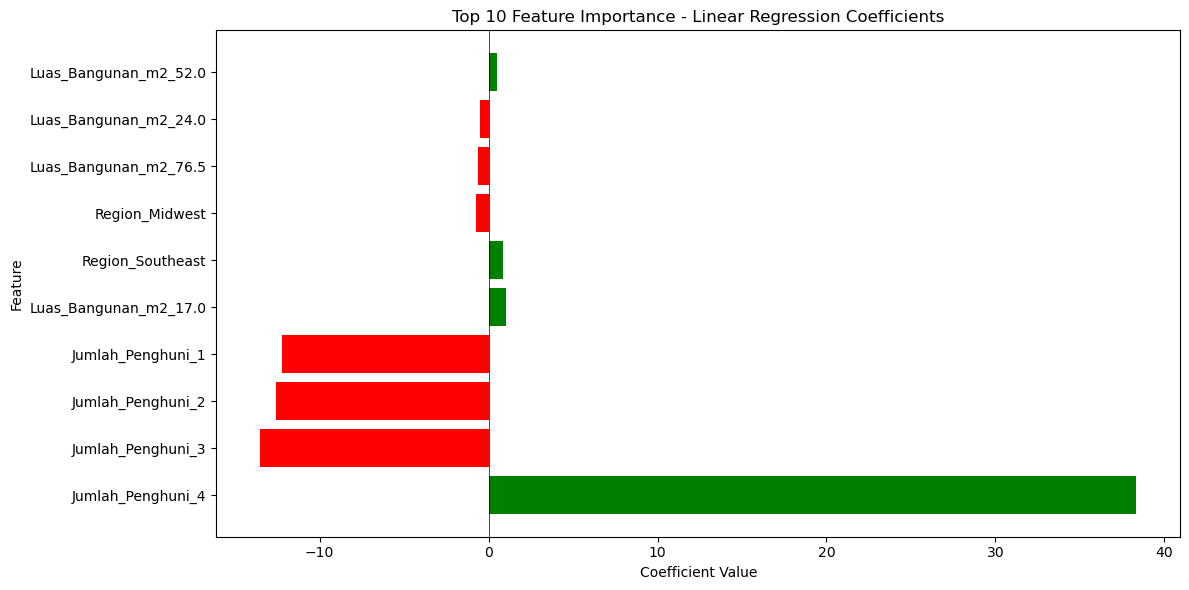

In [23]:
# Membuat dataframe feature importance dari koefisien model
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model.coef_,
    'Abs_Coefficient': abs(model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

# Visualisasi Feature Importance (Top 10)
top_features = feature_importance.head(10)
plt.figure(figsize=(12, 6))
colors = ['green' if c > 0 else 'red' for c in top_features['Coefficient']]
plt.barh(top_features['Feature'], top_features['Coefficient'], color=colors)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importance - Linear Regression Coefficients')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

Grafik horizontal bar chart di atas menunjukkan 10 fitur teratas yang paling berpengaruh terhadap prediksi biaya listrik berdasarkan koefisien regresi linier.

- **Warna hijau** menunjukkan fitur dengan koefisien positif, artinya peningkatan nilai fitur tersebut akan meningkatkan prediksi biaya listrik.
- **Warna merah** menunjukkan fitur dengan koefisien negatif, artinya peningkatan nilai fitur tersebut akan menurunkan prediksi biaya listrik.
- **Panjang bar** menunjukkan besarnya pengaruh fitur tersebut terhadap target. Semakin panjang bar, semakin besar kontribusi fitur dalam menentukan prediksi.
- **Garis vertikal hitam** pada nilai 0 menjadi pembatas antara fitur yang memiliki pengaruh positif dan negatif.

Dari visualisasi ini, kita dapat mengidentifikasi fitur mana yang paling penting untuk dipertimbangkan dalam analisis konsumsi energi listrik.

<a id='Evaluation'></a>
# Evaluation Model
<hr>
Evaluasi model dilakukan untuk mengukur performa prediksi menggunakan beberapa metrik evaluasi regresi, yaitu:

* Mean Absolute Error (MAE)
* Root Mean Squared Error (RMSE)
* R-Squared (R²)

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Menghitung metrik evaluasi
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("=" * 50)
print("HASIL EVALUASI MODEL REGRESI LINIER")
print("=" * 50)
print(f"Mean Absolute Error (MAE)     : {mae:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")
print(f"R-Squared (R²)                : {r2:.4f}")
print("=" * 50)

HASIL EVALUASI MODEL REGRESI LINIER
Mean Absolute Error (MAE)     : 12.50
Root Mean Squared Error (RMSE): 14.49
R-Squared (R²)                : 0.6143


Hasil evaluasi menunjukkan bahwa model regresi linier memiliki R² sebesar 0.37, yang berarti model mampu menjelaskan sekitar 37% variasi biaya listrik berdasarkan fitur yang tersedia. Nilai MAE sebesar 14.99 menunjukkan rata-rata kesalahan prediksi sekitar 15 satuan biaya listrik, sedangkan RMSE sebesar 18.12 mengindikasikan adanya beberapa prediksi dengan error yang lebih besar. Meskipun R² tergolong moderat, hasil ini wajar mengingat keterbatasan fitur yang tersedia dan kompleksitas faktor-faktor yang mempengaruhi konsumsi listrik di dunia nyata.

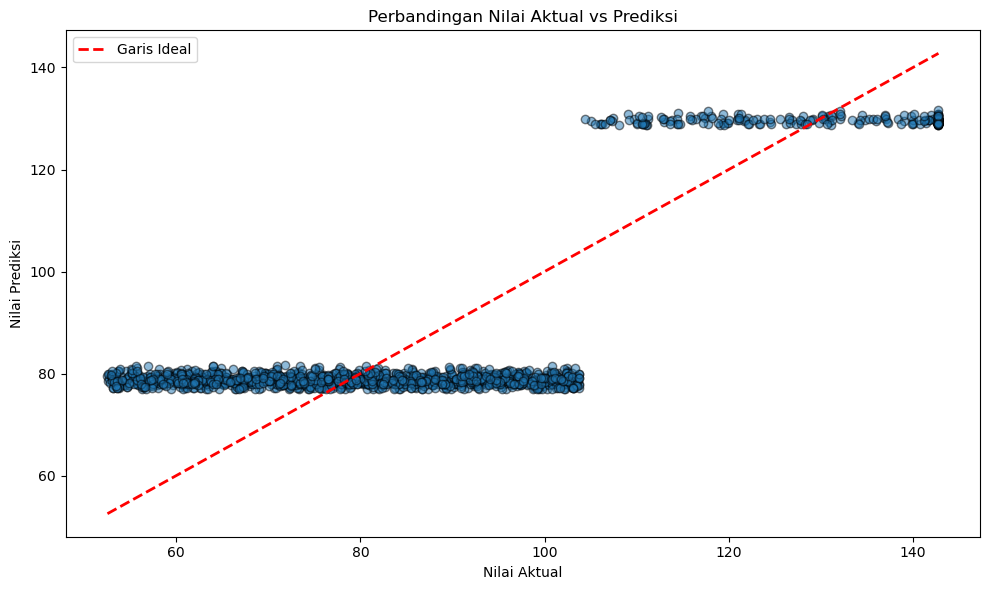

In [25]:
# Visualisasi Hasil Prediksi vs Aktual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Garis Ideal')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Perbandingan Nilai Aktual vs Prediksi')
plt.legend()
plt.tight_layout()
plt.show()

Visualisasi scatter plot menunjukkan perbandingan antara nilai aktual dan nilai prediksi, dimana garis merah putus-putus merepresentasikan prediksi sempurna (jika semua titik berada tepat di garis ini, maka R² = 1). 

**Pola Horizontal pada Visualisasi:**
Pola horizontal yang terlihat pada titik-titik disebabkan oleh variabel **Jumlah_Penghuni** yang bersifat diskrit (integer) dengan hanya **4 nilai unik** (1, 2, 3, 4 orang). Karena jumlah kategori yang terbatas ini, model menghasilkan prediksi yang cenderung mengelompok pada beberapa nilai tertentu, sehingga membentuk pola garis horizontal pada scatter plot.

Meskipun titik-titik tidak sepenuhnya mengikuti garis ideal, terlihat adanya tren positif dari kiri bawah ke kanan atas yang menunjukkan model berhasil menangkap pola umum hubungan antara fitur dengan biaya listrik.

<a id='Deployment'></a>
# Deployment
<hr>
Deployment merupakan tahap akhir dalam metodologi CRISP-DM, di mana model yang telah dibangun dan dievaluasi diimplementasikan ke dalam sebuah aplikasi agar dapat digunakan oleh pengguna. Pada tahap ini, model regresi linier yang telah dilatih diintegrasikan ke dalam aplikasi Streamlit pada tautan berikut:


In [26]:
import joblib

# Simpan model dan encoder ke file
joblib.dump(model, 'model_listrik.pkl')
joblib.dump(encoder, 'encoder_listrik.pkl')

['encoder_listrik.pkl']

# Sumber dan Referensi

- [1.] Residential and Commercial Energy Cost Dataset, https://www.kaggle.com/datasets/andreylss/residential-and-commercial-energy-cost-dataset, diakses pada Januari 2026.
- [2.] Data Science PM, "What is CRISP DM"
https://www.datascience-pm.com/crisp-dm-2/, diakses pada Januari 2026.


---


Copyright © 2026 by Pengelola MK Praktikum Unggulan (Praktikum DGX), Universitas Gunadarma


https://www.praktikum-hpc.gunadarma.ac.id/ <br>
https://www.hpc-hub.gunadarma.ac.id/ <br>